In [1]:
import numpy as np
import pandas as pd

# Experimenting for 6.19

In [2]:
df = pd.DataFrame(np.random.normal(size=100000), columns=['Z'])
df.describe()

,Z
count,100000.000000
mean,-0.002780
std,1.001457
min,-4.090475
25%,-0.680903
50%,-0.005109
75%,0.675200
max,4.353665


In [3]:
df['Y'] = df['Z'] ** 2
df

,Z,Y
0,1.595227,2.544748
1,-0.141339,0.019977
2,-1.165714,1.358890
3,0.293688,0.086253
4,0.094915,0.009009
...,...,...
99995,0.459392,0.211041
99996,-0.355651,0.126487
99997,0.014414,0.000208
99998,-0.023753,0.000564


In [4]:
df['W'] = df['Z'] / np.abs(df['Z'])
df

,Z,Y,W
0,1.595227,2.544748,1.0
1,-0.141339,0.019977,-1.0
2,-1.165714,1.358890,-1.0
3,0.293688,0.086253,1.0
4,0.094915,0.009009,1.0
...,...,...,...
99995,0.459392,0.211041,1.0
99996,-0.355651,0.126487,-1.0
99997,0.014414,0.000208,1.0
99998,-0.023753,0.000564,-1.0


In [5]:
df.cov()

,Z,Y,W
Z,1.002916,0.002311,0.799373
Y,0.002311,2.007511,0.002059
W,0.799373,0.002059,0.999994


In [6]:
df.corr()

,Z,Y,W
Z,1.000000,0.001629,0.798213
Y,0.001629,1.000000,0.001453
W,0.798213,0.001453,1.000000


In [7]:
df.describe()

,Z,Y,W
count,100000.000000,1.000000e+05,100000.000000
mean,-0.002780,1.002914e+00,-0.004060
std,1.001457,1.416867e+00,0.999997
min,-4.090475,2.661327e-10,-1.000000
25%,-0.680903,1.020774e-01,-1.000000
50%,-0.005109,4.598530e-01,-1.000000
75%,0.675200,1.327922e+00,1.000000
max,4.353665,1.895440e+01,1.000000


In [8]:
# Define mean values and covariance matrix
mean = [0, 0]
covariance_matrix = [[1, 0.5], [0.5, 1]]

# Generate bivariate normal random variables
num_samples = 100000
df_2 = pd.DataFrame(np.random.multivariate_normal(mean, covariance_matrix, num_samples), columns=['z0', 'z1'])
df_2.describe()

,z0,z1
count,100000.000000,100000.000000
mean,0.003941,0.005706
std,0.997563,0.994764
min,-4.013867,-4.411251
25%,-0.672493,-0.666124
50%,0.000849,0.005464
75%,0.677311,0.677921
max,4.202528,4.377410


In [9]:
df_2['Y'] = np.linalg
df_2.describe()

,z0,z1
count,100000.000000,100000.000000
mean,0.003941,0.005706
std,0.997563,0.994764
min,-4.013867,-4.411251
25%,-0.672493,-0.666124
50%,0.000849,0.005464
75%,0.677311,0.677921
max,4.202528,4.377410


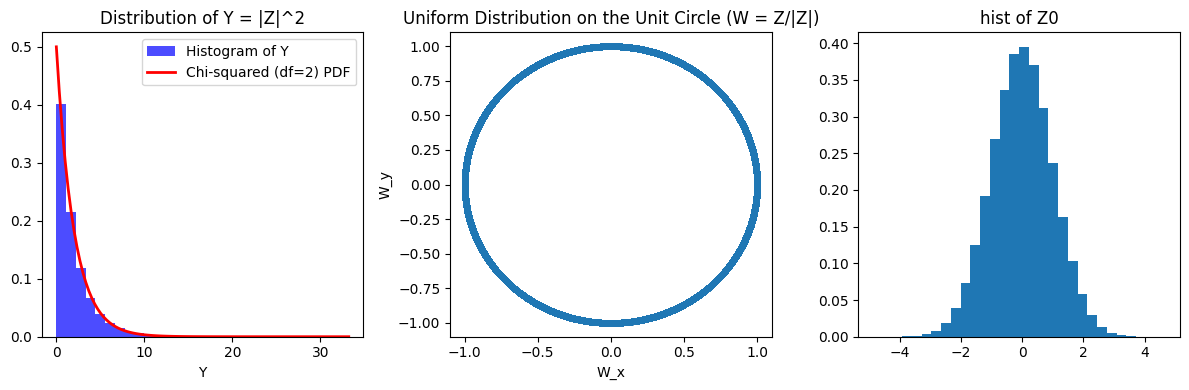

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# mean and covariance matrix for bivariate normal distribution
mean = [0, 0]
covariance_matrix = [[1, 0.4], [0.4, 1]]

# bivariate normal random variables
num_samples = 1000000
Z = np.random.multivariate_normal(mean, covariance_matrix, num_samples)

# Transform Z into Y = |Z|^2 
Y = np.sum(Z ** 2, axis=1)

plt.figure(figsize=(12, 4))

# histogram of Y and compare to the chi-squared distribution
plt.subplot(1, 3, 1)
plt.hist(Y, bins=30, density=True, alpha=0.7, color='blue', label='Histogram of Y')
x_values = np.linspace(0, max(Y), 100)
plt.plot(x_values, chi2.pdf(x_values, df=2), 'r-', lw=2, label='Chi-squared (df=2) PDF')
plt.title('Distribution of Y = |Z|^2')
plt.xlabel('Y')
plt.legend()

# transform Z into W = Z/|Z| and plot it on the unit circle
W = Z / np.linalg.norm(Z, axis=1)[:, np.newaxis]

plt.subplot(1, 3, 2)
plt.scatter(W[:, 0], W[:, 1], marker='.')
plt.title('Uniform Distribution on the Unit Circle (W = Z/|Z|)')
plt.xlabel('W_x')
plt.ylabel('W_y')

# dist of z_0
plt.subplot(1, 3, 3)
plt.hist(Z[:, 0], density=True, bins=30)
plt.title('hist of Z0')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Uniform Distribution on the Unit Circle (W = Z/|Z|)')

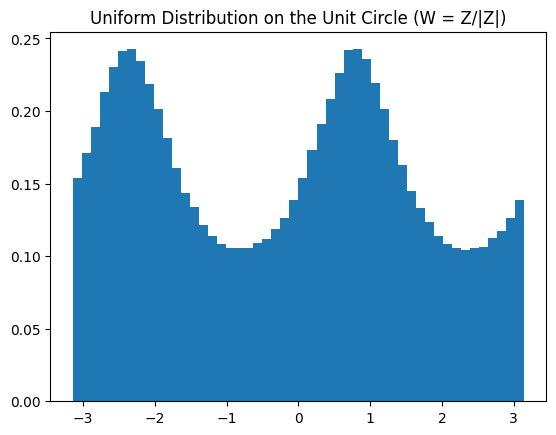

In [103]:
plt.hist(np.arctan2(W[:, 1], W[:, 0]), bins=50, density=True)
plt.title('Uniform Distribution on the Unit Circle (W = Z/|Z|)')

In [84]:
print(f'Z0 mean {np.mean(Z[:, 0])}, Z1 mean {np.mean(Z[:, 1])}')
print()
print(f'Y mean {np.mean(Y)}, std {np.std(Y)}')
print()
print(f'W0 mean {np.mean(W[:, 0])}, W1 mean {np.mean(W[:, 1])}')

Z0 mean 2.548155286700169e-05, Z1 mean 0.0009087675830712561

Y mean 1.998295858261335, std 1.9960691056517466

W0 mean -0.0001451883900520084, W1 mean 0.0007028848978760378


In [85]:
np.cov(W[:, 0], Y)

array([[5.00067523e-01, 4.27323705e-04],
       [4.27323705e-04, 3.98429586e+00]])

In [86]:
normal = np.random.normal(size=10000)
print(np.mean(normal) ** 2)
print(np.mean(normal ** 2))

2.1533322613782177e-05
0.9863151182879656


In [87]:
from scipy.integrate import dblquad

def integrand(z1, z0):
    return z0 / np.sqrt(z0 ** 2 + z1 ** 2) * (1 / (2 * np.pi)) * np.exp(-0.5 * (z0 ** 2 + z1 ** 2))


# Perform the double integration
result, _ = dblquad(integrand, -np.inf, np.inf, lambda z0: -np.inf, lambda z0: np.inf)

print("Expected value:", result)


Expected value: 0.0


In [88]:
def integrand(z1, z0):
    return z0 * np.sqrt(z0 ** 2 + z1 ** 2) * (1 / (2 * np.pi)) * np.exp(-0.5 * (z0 ** 2 + z1 ** 2))

# Perform the double integration
result, _ = dblquad(integrand, -np.inf, np.inf, lambda z0: -np.inf, lambda z0: np.inf)

print("Expected value:", result)

Expected value: 0.0


In [89]:
pd.DataFrame(W).corr()

,0,1
0,1.000000,-0.001316
1,-0.001316,1.000000


          w0        w1
w0  1.000000  0.000406
w1  0.000406  1.000000


Text(0.5, 1.0, 'hist of U2')

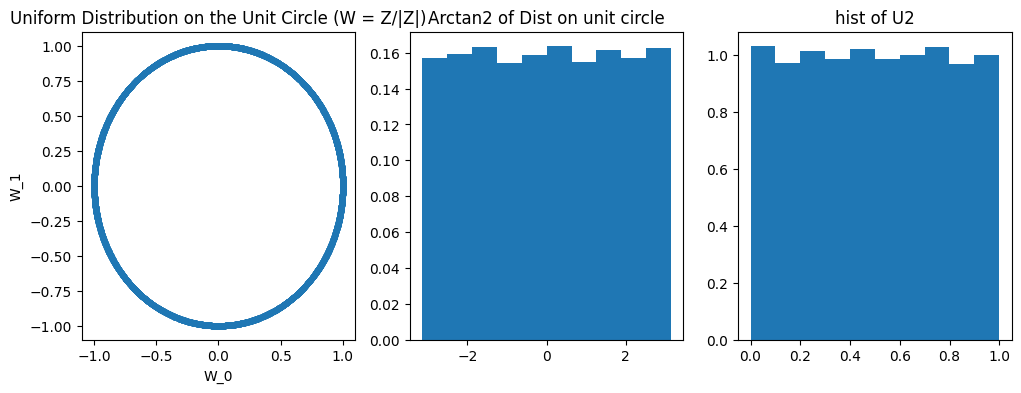

In [101]:
num_points = 10000
U1 = np.random.uniform(0, 1, num_points)
U2 = np.random.uniform(0, 1, num_points)
W0 = np.cos(2 * np.pi * U2-1)
W1 = np.sin(2 * np.pi * U2-1)

print(pd.DataFrame({'w0':W0,'w1':W1}).corr())

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.scatter(W0, W1, marker='.')
plt.title('Uniform Distribution on the Unit Circle (W = Z/|Z|)')
plt.xlabel('W_0')
plt.ylabel('W_1')
plt.subplot(1, 3, 2)
plt.hist(np.arctan2(W1, W0), density=True, )
plt.title("Arctan2 of Dist on unit circle")

# dist of U2
plt.subplot(1, 3, 3)
plt.hist(U2, density=True)
plt.title('hist of U2')